In [1]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy
from tqdm import tqdm
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances


x,y = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant= 0, n_clusters_per_class=1, random_state=60)
#help(make_classification)
X_train, X_test, Y_train, Y_test = train_test_split(x,y,stratify=y,random_state=42)


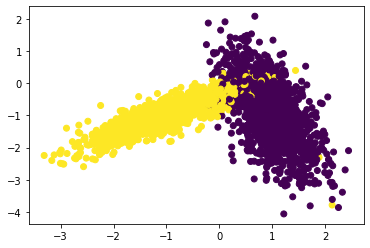

In [2]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
colors = {0:'red', 1:'blue'}
plt.scatter(X_test[:,0], X_test[:,1],c=Y_test)
plt.show()
#plt.get_cmap('magma')

# Implementing Custom RandomSearchCV

<pre>
def RandomSearchCV(x_train,y_train,classifier, param_range, folds):
    # x_train: its numpy array of shape, (n,d)
    # y_train: its numpy array of shape, (n,) or (n,1)
    # classifier: its typically KNeighborsClassifier()
    # param_range: its a tuple like (a,b) a < b
    # folds: an integer, represents number of folds we need to devide the data and test our model
    
    
    #1.generate 10 unique values(uniform random distribution) in the given range "param_range" and store them as "params" 
    # ex: if param_range = (1, 50), we need to generate 10 random numbers in range 1 to 50
    #2.devide numbers ranging from  0 to len(X_train) into groups= folds
    # ex: folds=3, and len(x_train)=100, we can devide numbers from 0 to 100 into 3 groups 
      group 1: 0-33, group 2:34-66, group 3: 67-100
    #3.for each hyperparameter that we generated in step 1:
        # and using the above groups we have created in step 2 you will do cross-validation as follows
        
        # first we will keep group 1+group 2 i.e. 0-66 as train data and group 3: 67-100 as test data, and find train and
          test accuracies
          
        # second we will keep group 1+group 3 i.e. 0-33, 67-100 as train data and group 2: 34-66 as test data, and find
          train and test accuracies
          
        # third we will keep group 2+group 3 i.e. 34-100 as train data and group 1: 0-33 as test data, and find train and
          test accuracies
        # based on the 'folds' value we will do the same procedure
        
        # find the mean of train accuracies of above 3 steps and store in a list "train_scores"
        # find the mean of test accuracies of above 3 steps and store in a list "test_scores"
    #4. return both "train_scores" and "test_scores"

#5. call function RandomSearchCV(x_train,y_train,classifier, param_range, folds) and store the returned values into "train_score", and "cv_scores"
#6. plot hyper-parameter vs accuracy plot as shown in reference notebook and choose the best hyperparameter
#7. plot the decision boundaries for the model initialized with the best hyperparameter, as shown in the last cell of reference notebook

</pre>

In [9]:
def RandomSearchCv(x_train,y_train,classifier,param_range,folds):
    '''This function returns the train accuracy scores and test accuracy scores for given,
       values of x_train,y_train,param_range:a tuple of length 2 with range(parameters) to perform tuning'''
    global params        
    trainscores = []
    testscores =  []

    elements_per_fold = int(len(x_train) / folds) #7500/3=2500 elements in each fold
    params=sorted(random.sample(range(param_range[0],param_range[1]), 10))
    for k in tqdm(params):
        trainscores_folds = []
        testscores_folds = []

        for i in range(folds): #range(0-3)
            test_indices = list(set(list(range(i*elements_per_fold, (i+1)*elements_per_fold)))) #2500 elements for each fold
            train_indices = list(set(list(range(1, len(x_train)))) - set(test_indices) )#5000 elements for each fold
            
            X_train= x_train[train_indices]
            Y_train= y_train[train_indices]
            X_test= x_train[test_indices]
            Y_test= y_train[test_indices]


            classifier.n_neighbors = k
            classifier.fit(X_train, Y_train) 

            y_predicted = classifier.predict(X_train)
            trainscores_folds.append(accuracy_score(Y_train, y_predicted))
            #predicts the accuracy score by comparing  X_train with Y_train
           


            y_predicted = classifier.predict(X_test)
            testscores_folds.append(accuracy_score(Y_test, y_predicted))
            #predicts the accuracy score by comparing X_test with Y_test

        trainscores.append(np.mean(np.array(trainscores_folds)))
        testscores.append(np.mean(np.array(testscores_folds)))
    print(params)
    return trainscores,testscores

In [20]:
#Setting the variables for analysis

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import random

neigh = KNeighborsClassifier()
folds=3
param_range=(1,50)

trainscores,testscores=RandomSearchCv(X_train,Y_train,neigh, param_range, folds)

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:07<00:00,  1.41it/s]

[5, 8, 12, 14, 18, 29, 32, 35, 37, 47]


### performing hyperparameter tuning( _for determining the best value for k_)


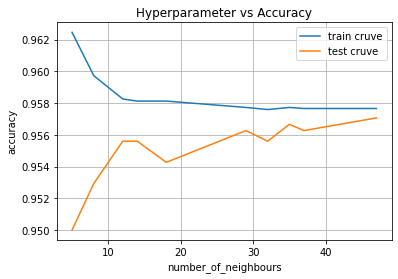

In [21]:
import matplotlib.pyplot as plt

plt.plot(params,trainscores, label='train cruve')
plt.plot(params,testscores, label='test cruve')
plt.title('Hyperparameter vs Accuracy')
plt.legend()
plt.xlabel('number_of_neighbours')
plt.ylabel('accuracy')
plt.grid()
plt.show()

Best value of k is the value at which the accuracy is high on the plot.By obeserving the plot we can say that with k=34
,we will have about 95.5% accuracy

In [22]:
def plot_decision_boundary(X1, X2, y, clf):
    '''function plots the decision boundary '''
    cmap_light = ListedColormap(['thistle', 'beige'])  #color_palate(background_class):[class2,class1]
    cmap_bold = ListedColormap(['indigo', 'gold'])   #color_palate(scatterplot_class):[class2,class1]

    x_min, x_max = X1.min() - 1, X1.max() + 1
    y_min, y_max = X2.min() - 1, X2.max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]) # predicts the testing ds for train 
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    plt.scatter(X1, X2, c=y, cmap=cmap_bold)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f"2-Class classification (k ={clf.n_neighbors})" )
    plt.show()

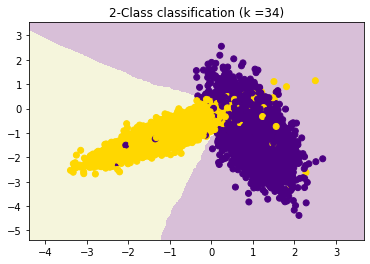

In [24]:
import matplotlib
from matplotlib.colors import ListedColormap

neigh = KNeighborsClassifier(n_neighbors = 34) #setting the number of neighbours in accordance to the "Hyperparameter vs Accuracy plot"
neigh.fit(X_train, Y_train)

plot_decision_boundary(X_train[:, 0], X_train[:, 1],Y_train,neigh)